# Wine Quality Analysis

Exploring the Wine Quality Dataset to analyze chemical properties and quality ratings of red and white wines.

**Dataset:** Wine Quality Dataset (UCI Machine Learning Repository)  
**Tools:** Python, matplotlib, statistics module

In [60]:
%matplotlib inline
import collections
import statistics
import random
import math
import matplotlib.pyplot as plt
import csv

## Loading the Data

Reading the wine quality CSV file into a list of lists structure.

In [61]:
with open("winequality.csv", "r") as f:
    reader = csv.reader(f)
    columns = next(reader)
    wine_data = [row for row in reader]
print(columns)

['type', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'sulphates', 'alcohol']


In [62]:
# Check that first item in list is stored correctly:
print(wine_data[0])
# Check that last item in the list is stored correctly:
print(wine_data[-1])
print(len(wine_data))

['white', '6', '7', '0.27', '0.36', '3', '0.45', '8.8']
['red', '6', '6', '0.31', '0.47', '3.39', '0.66', '11']
6497


## Graphing Function

A versatile graphing function that can create bar, line, and scatter plots.

In [63]:
def create_plot(x_data, y_data, x_label, y_label, graph_type):
    plt.figure()
    if graph_type == "bar":
        plt.bar(x_data, y_data)
    elif graph_type == "line":
        plt.plot(x_data, y_data)
    elif graph_type == "scatter":
        plt.scatter(x_data, y_data)
    else:
        raise ValueError("graph_type must be 'bar', 'line', or 'scatter'")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## Relating Citric Acid levels to pH levels

In this graph, I was curious to know the differences between the two levels for the wines and how they relate to each other.

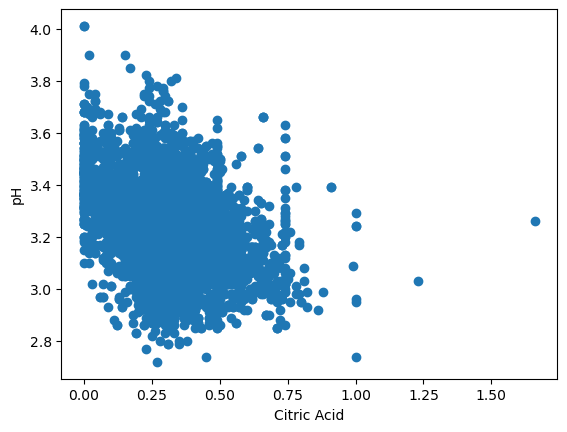

In [64]:
citric_values = []
ph_values = []
for row in wine_data:
    citric_value = float(row[4]) 
    pH_value = float(row[5])
    citric_values.append(citric_value)
    ph_values.append(pH_value)
create_plot(citric_values,ph_values,"Citric Acid","pH", "scatter")

## Quality Rating Distribution

Counting how many wines fall into each quality rating category using a dictionary.

In [65]:
from collections import defaultdict
quality_counts = defaultdict(int)
for row in wine_data:
    quality = row[1]
    quality_counts[quality] += 1

In [66]:
quality_counts

defaultdict(int,
            {'6': 2836,
             '5': 2138,
             '7': 1079,
             '8': 193,
             '4': 216,
             '3': 30,
             '9': 5})

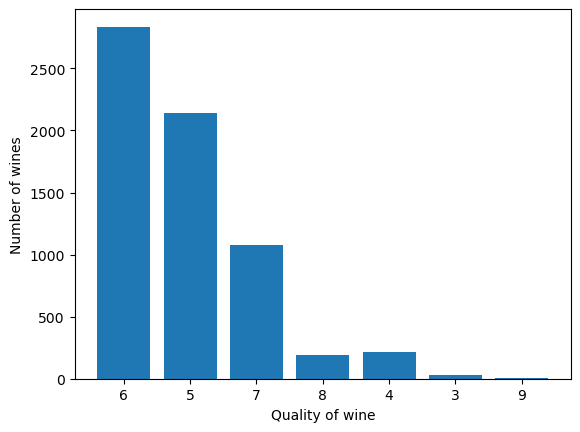

In [67]:
x_values = list(quality_counts.keys())
y_values = list(quality_counts.values())
create_plot(x_values, y_values, "Quality of wine", "Number of wines", "bar")

### Sorting for Better Visualization

The x-axis isn't in order because dictionaries don't maintain sorted order. Sorting the dictionary items before graphing.

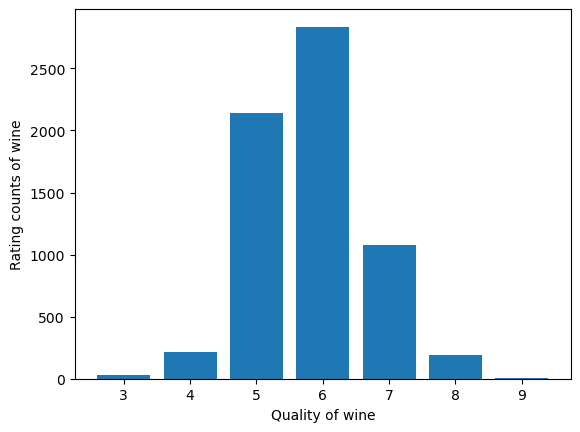

In [68]:
quality_items = quality_counts.items()
quality_pairs = list(quality_items)
sorted_items = sorted(quality_counts.items())
keys, values = zip(*sorted_items)
x_sorted = list(keys)
y_sorted = list(values)
create_plot(x_sorted, y_sorted, "Quality of wine", "Rating counts of wine", "bar")

**Observation:** The graph looks like a bell curve now that the quality is sorted. Seems that average is the most common while bad quality and good quality wines are more rare.

## Statistical Analysis

It's commonly said that red wine has higher alcohol content than white wine. Let's look at some statistics to see if there is a clear difference.

First, creating separate lists for red and white wine alcohol content.

In [69]:
red_alc = []
white_alc = []

for row in wine_data:
    wine = row[0]
    alcohol_value = float(row[7])
    if wine == "red":
        red_alc.append(alcohol_value)
    else:
        white_alc.append(alcohol_value)

In [70]:
red_mean = statistics.mean(red_alc)
red_mode = statistics.mode(red_alc)
red_std = statistics.stdev(red_alc)
white_mean = statistics.mean(white_alc)
white_mode = statistics.mode(white_alc)
white_std = statistics.stdev(white_alc)
red_wine_stats = {
    "mean": red_mean,
    "mode": red_mode,
    "std": red_std
}
white_wine_stats = {
    "mean": white_mean,
    "mode": white_mode,
    "std": white_std
}
print("Red Wine:", red_wine_stats)
print("White Wine:", white_wine_stats)

Red Wine: {'mean': 10.422983114446529, 'mode': 9.5, 'std': 1.0656675818473949}
White Wine: {'mean': 10.514267047774602, 'mode': 9.4, 'std': 1.2306205677573179}


## Confidence Intervals

Using both the traditional mean approach and bootstrap method to create a 90% confidence interval on the red wine's alcohol content mean.

### Traditional Confidence Interval

In [71]:
mean = red_wine_stats["mean"]
std = red_wine_stats["std"]
# Sample Size
n = len(red_alc)
std_error = red_wine_stats["std"] / math.sqrt(n)
# 90% Confidence
t = 1.645
conf_intrv = t * std_error
confidence_interval = [mean - conf_intrv, mean + conf_intrv]

In [72]:
print("Confidence Interval:", confidence_interval)

Confidence Interval: [10.379143833226415, 10.466822395666643]


### Bootstrap Confidence Interval

Using bootstrapping to find 10,000 sample means on the red wine alcohol data.

In [73]:
import random

bootstrap_means = []

for x in range(10000):
    
    sample = random.choices(red_alc, k=1500)
    bootstrap_means.append(statistics.mean(sample))

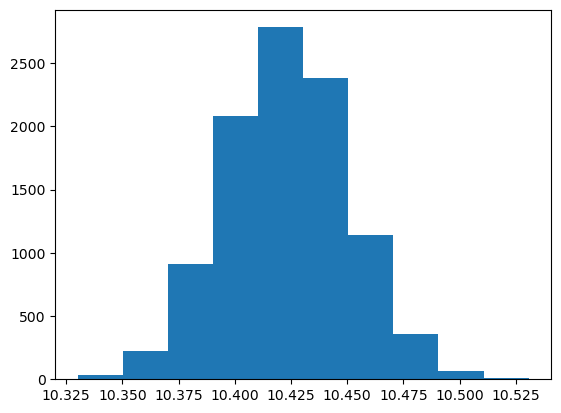

In [74]:
plt.hist(bootstrap_means);

In [76]:
bootstrap_means_sorted = sorted(bootstrap_means)
lower_idx = int(0.05 * len(bootstrap_means_sorted))  # 5th percentile
upper_idx = int(0.95 * len(bootstrap_means_sorted))  # 95th percentile

bootstrap_ci = [bootstrap_means_sorted[lower_idx], bootstrap_means_sorted[upper_idx]]
print("Bootstrap 90% Confidence Interval:", bootstrap_ci)

Bootstrap 90% Confidence Interval: [10.378277777777777, 10.4685]


## Reflection

This analysis explored the Wine Quality Dataset to understand the distribution of quality ratings and compare alcohol content between red and white wines.
The quality ratings followed a bell curve distribution, with most wines rated 5-6 on the scale. Very few wines received extremely low (3) or high (9) ratings, suggesting that exceptional quality in either direction is rare.
For alcohol content, red wines had a mean of about 10.42% while white wines averaged around 10.51% - nearly identical. The 90% confidence interval for red wine alcohol content using the traditional method was [10.38, 10.47], and the bootstrap method produced a very similar interval of [10.38, 10.47]. The consistency between both methods validates the results.

Contrary to popular belief that red wines have higher alcohol content, this dataset shows minimal difference between red and white wines.